In [2]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
reds = pd.read_csv("wineQualityReds.csv", index_col=0)
whites = pd.read_csv("wineQualityWhites.csv", index_col=0)

In [4]:
reds.info()
# add missing data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [5]:
whites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 1 to 4898
Data columns (total 12 columns):
fixed.acidity           4898 non-null float64
volatile.acidity        4898 non-null float64
citric.acid             4898 non-null float64
residual.sugar          4898 non-null float64
chlorides               4898 non-null float64
free.sulfur.dioxide     4898 non-null float64
total.sulfur.dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [6]:
reds.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   
4                 17.0                  60.0   0.9980  3.16       0.58   
5                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
1      9.4        5  
2      9.8        5  
3      9.8        5  
4      9.8        6  
5      9.4        5

In [7]:
whites.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.0              0.27         0.36            20.7      0.045   
2            6.3              0.30         0.34             1.6      0.049   
3            8.1              0.28         0.40             6.9      0.050   
4            7.2              0.23         0.32             8.5      0.058   
5            7.2              0.23         0.32             8.5      0.058   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 45.0                 170.0   1.0010  3.00       0.45   
2                 14.0                 132.0   0.9940  3.30       0.49   
3                 30.0                  97.0   0.9951  3.26       0.44   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
1      8.8        6  
2      9.5        6  
3     10.1        6  
4      9.9        6  
5      9.9        6

In [11]:
reds['type'] = "red"
whites['type'] = "white"
frames = [reds, whites]

wines = pd.concat(frames)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   
4                 17.0                  60.0   0.9980  3.16       0.58   
5                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
1      9.4        5  red  
2      9.8        5  red  
3      9.8        5  red  
4      9.8        6  red  
5      9.4        5  red

In [27]:
wines[wines.index.duplicated()]

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1               7.0              0.27         0.36           20.70      0.045   
2               6.3              0.30         0.34            1.60      0.049   
3               8.1              0.28         0.40            6.90      0.050   
4               7.2              0.23         0.32            8.50      0.058   
5               7.2              0.23         0.32            8.50      0.058   
6               8.1              0.28         0.40            6.90      0.050   
7               6.2              0.32         0.16            7.00      0.045   
8               7.0              0.27         0.36           20.70      0.045   
9               6.3              0.30         0.34            1.60      0.049   
10              8.1              0.22         0.43            1.50      0.044   
11              8.1              0.27         0.41            1.45      0.033   
12              8.6              0.23         0.40            4.20      0.035   
13              7.9              0.18         0.37            1.20      0.040   
14              6.6              0.16         0.40            1.50      0.044   
15              8.3              0.42         0.62           19.25      0.040   
16              6.6              0.17         0.38            1.50      0.032   
17              6.3              0.48         0.04            1.10      0.046   
18              6.2              0.66         0.48            1.20      0.029   
19              7.4              0.34         0.42            1.10      0.033   
20              6.5              0.31         0.14            7.50      0.044   
21              6.2              0.66         0.48            1.20      0.029   
22              6.4              0.31         0.38            2.90      0.038   
23              6.8              0.26         0.42            1.70      0.049   
24              7.6              0.67         0.14            1.50      0.074   
25              6.6              0.27         0.41            1.30      0.052   
26              7.0              0.25         0.32            9.00      0.046   
27              6.9              0.24         0.35            1.00      0.052   
28              7.0              0.28         0.39            8.70      0.051   
29              7.4              0.27         0.48            1.10      0.047   
30              7.2              0.32         0.36            2.00      0.033   
...             ...               ...          ...             ...        ...   
1570            6.7              0.30         0.74            5.00      0.038   
1571            6.6              0.30         0.74            4.60      0.041   
1572            7.4              0.30         0.49            8.20      0.055   
1573            6.9              0.22         0.49            7.00      0.063   
1574            7.8              0.26         0.49            3.10      0.045   
1575            8.5              0.17         0.49            8.80      0.048   
1576            6.8              0.17         0.74            2.40      0.053   
1577            6.2              0.27         0.49            1.40      0.050   
1578            7.1              0.64         0.49            1.80      0.050   
1579            6.4              0.18         0.74           11.90      0.046   
1580            7.6              0.31         0.49           13.40      0.062   
1581            9.8              0.31         0.49           15.40      0.046   
1582            9.0              0.30         0.49            7.20      0.039   
1583            8.4              0.24         0.49            7.40      0.039   
1584            6.4              0.18         0.74           11.90      0.046   
1585            6.4              0.25         0.74            7.80      0.045   
1586            7.3              0.30         0.74           13.50      0.039   
1587            9.3              0.31

In [28]:
wines = pd.concat([reds,whites], ignore_index=True)
wines.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

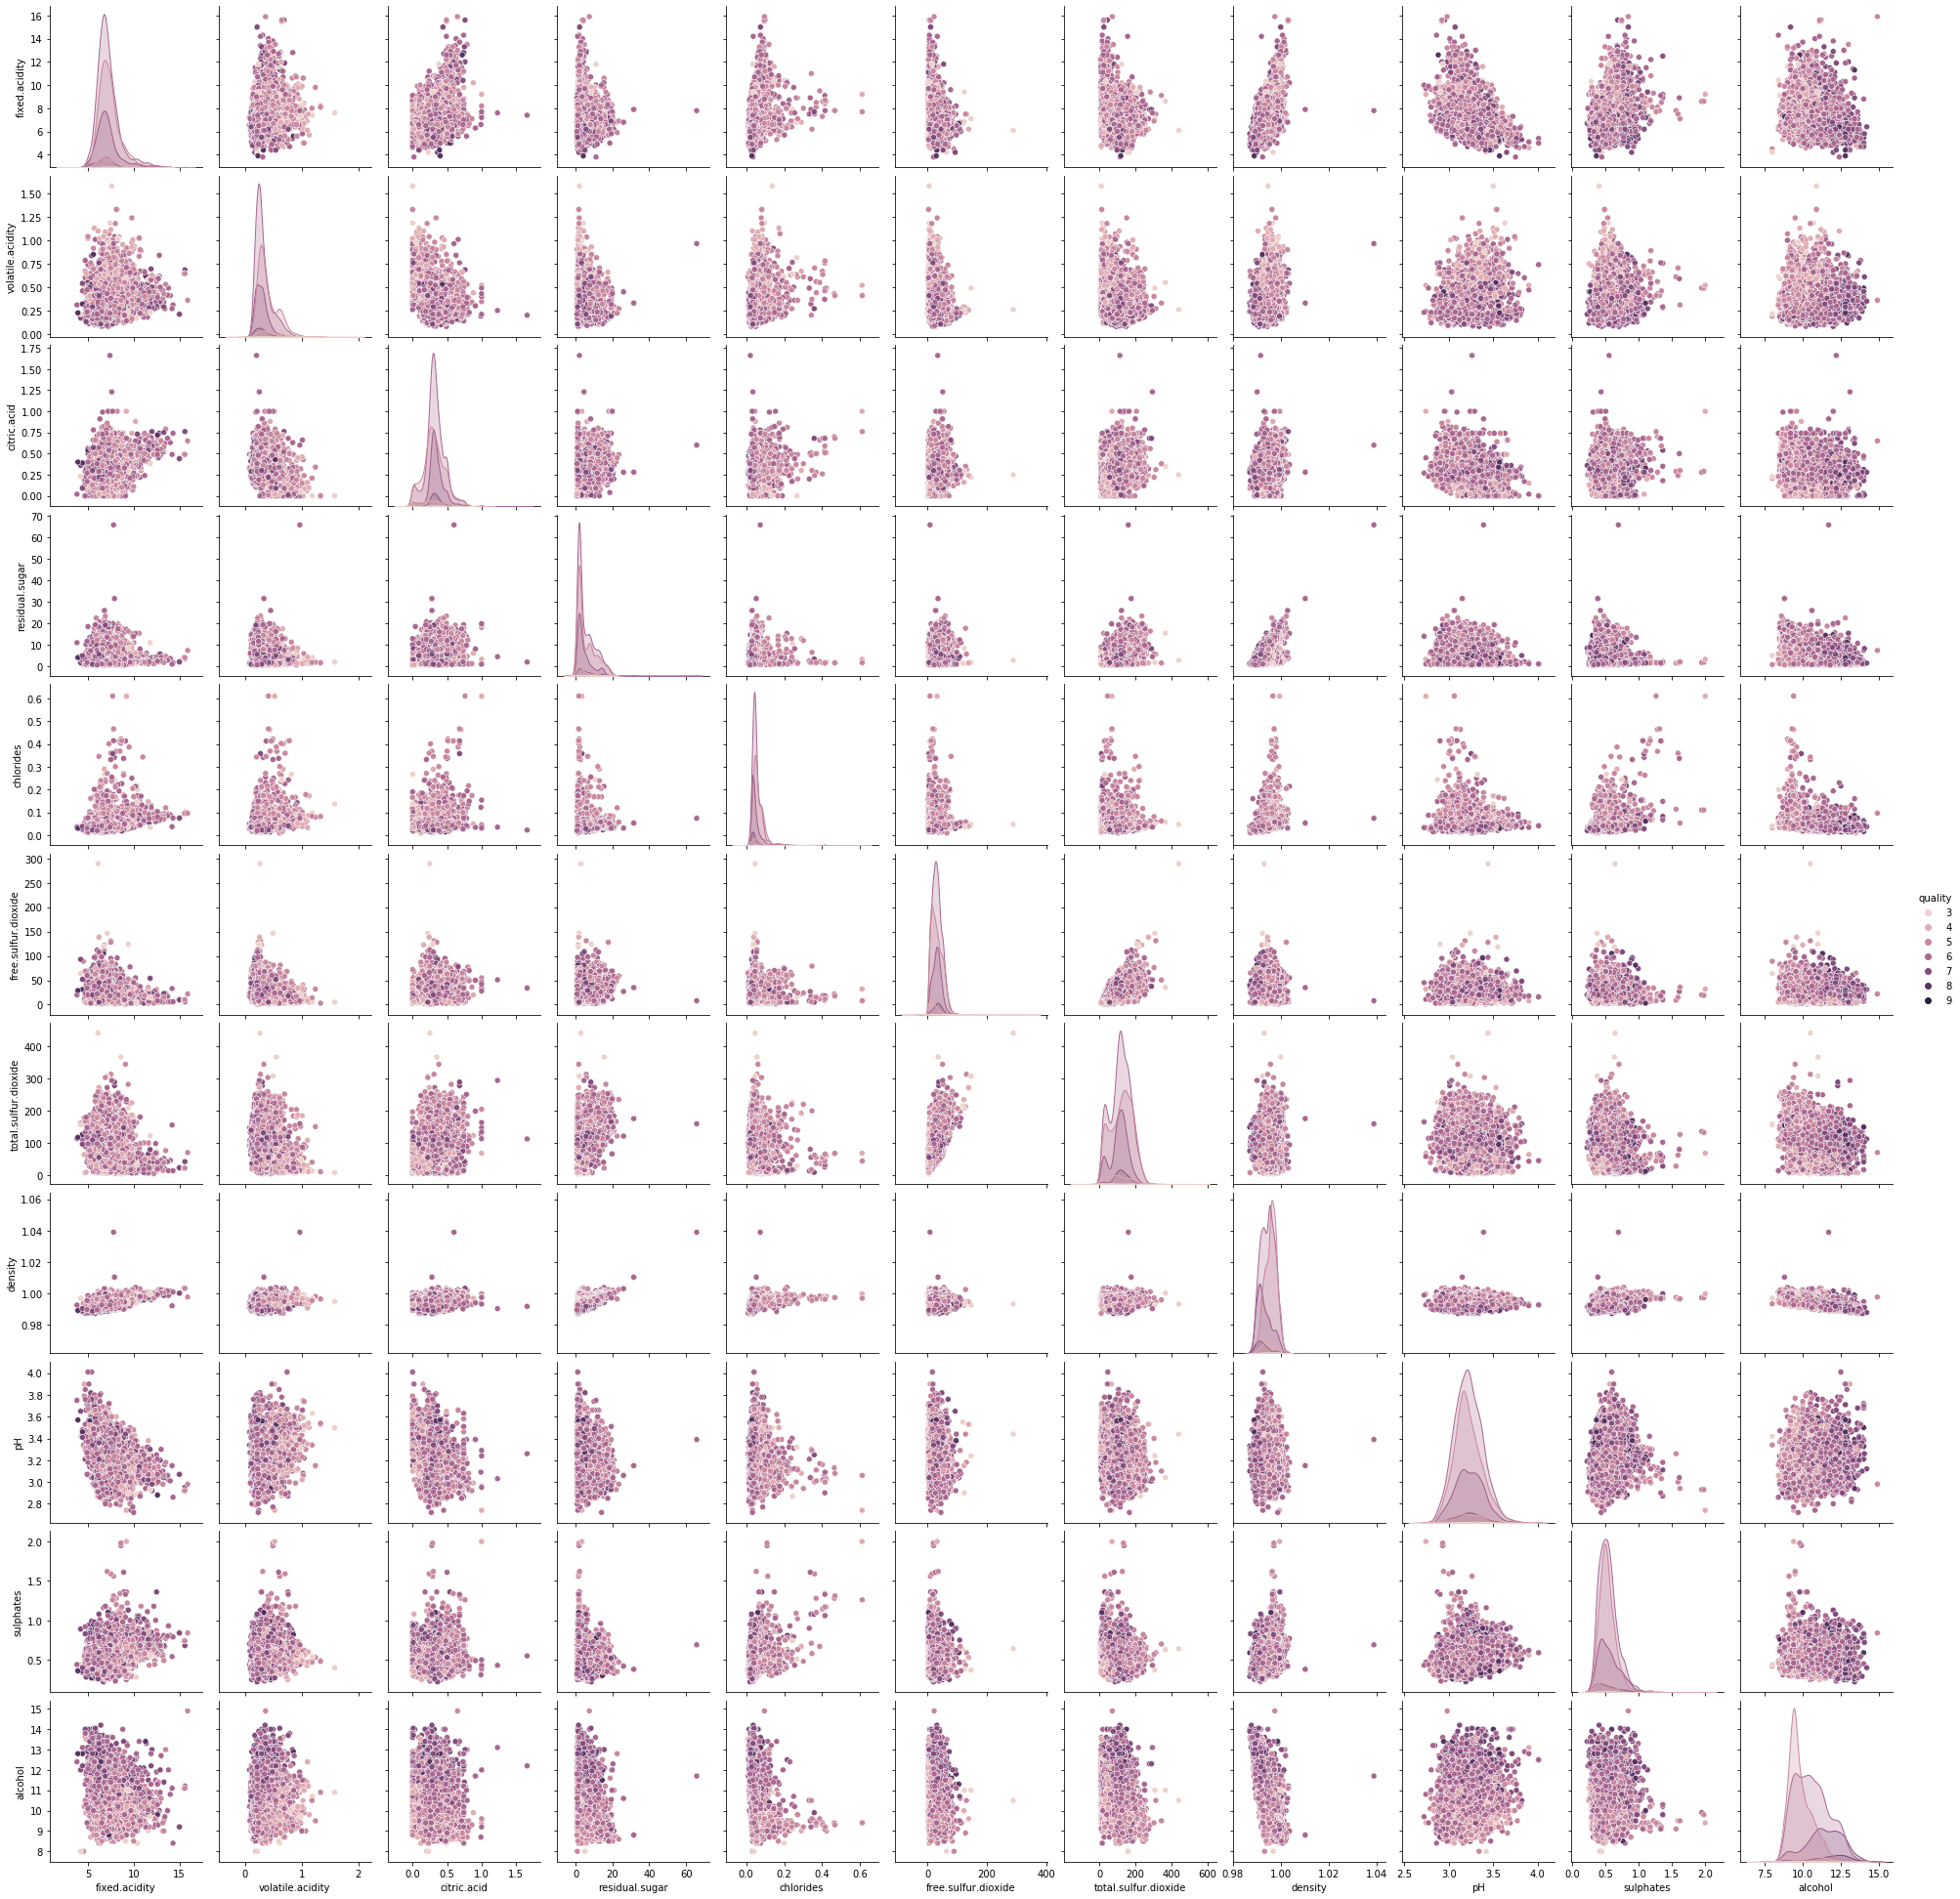

In [32]:
#sns.pairplot(wines, hue='quality',palette="bright")
sns.pairplot(
    wines,
    hue = "quality"
)

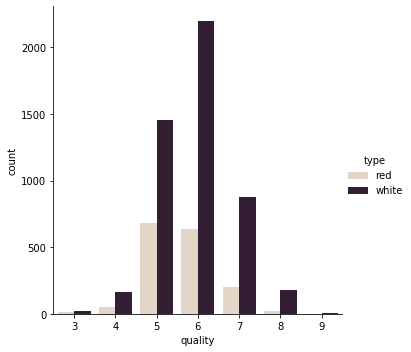

In [33]:
# wines quality
sns.catplot(x="quality", kind="count", palette="ch:.25", data=wines, hue = "type");

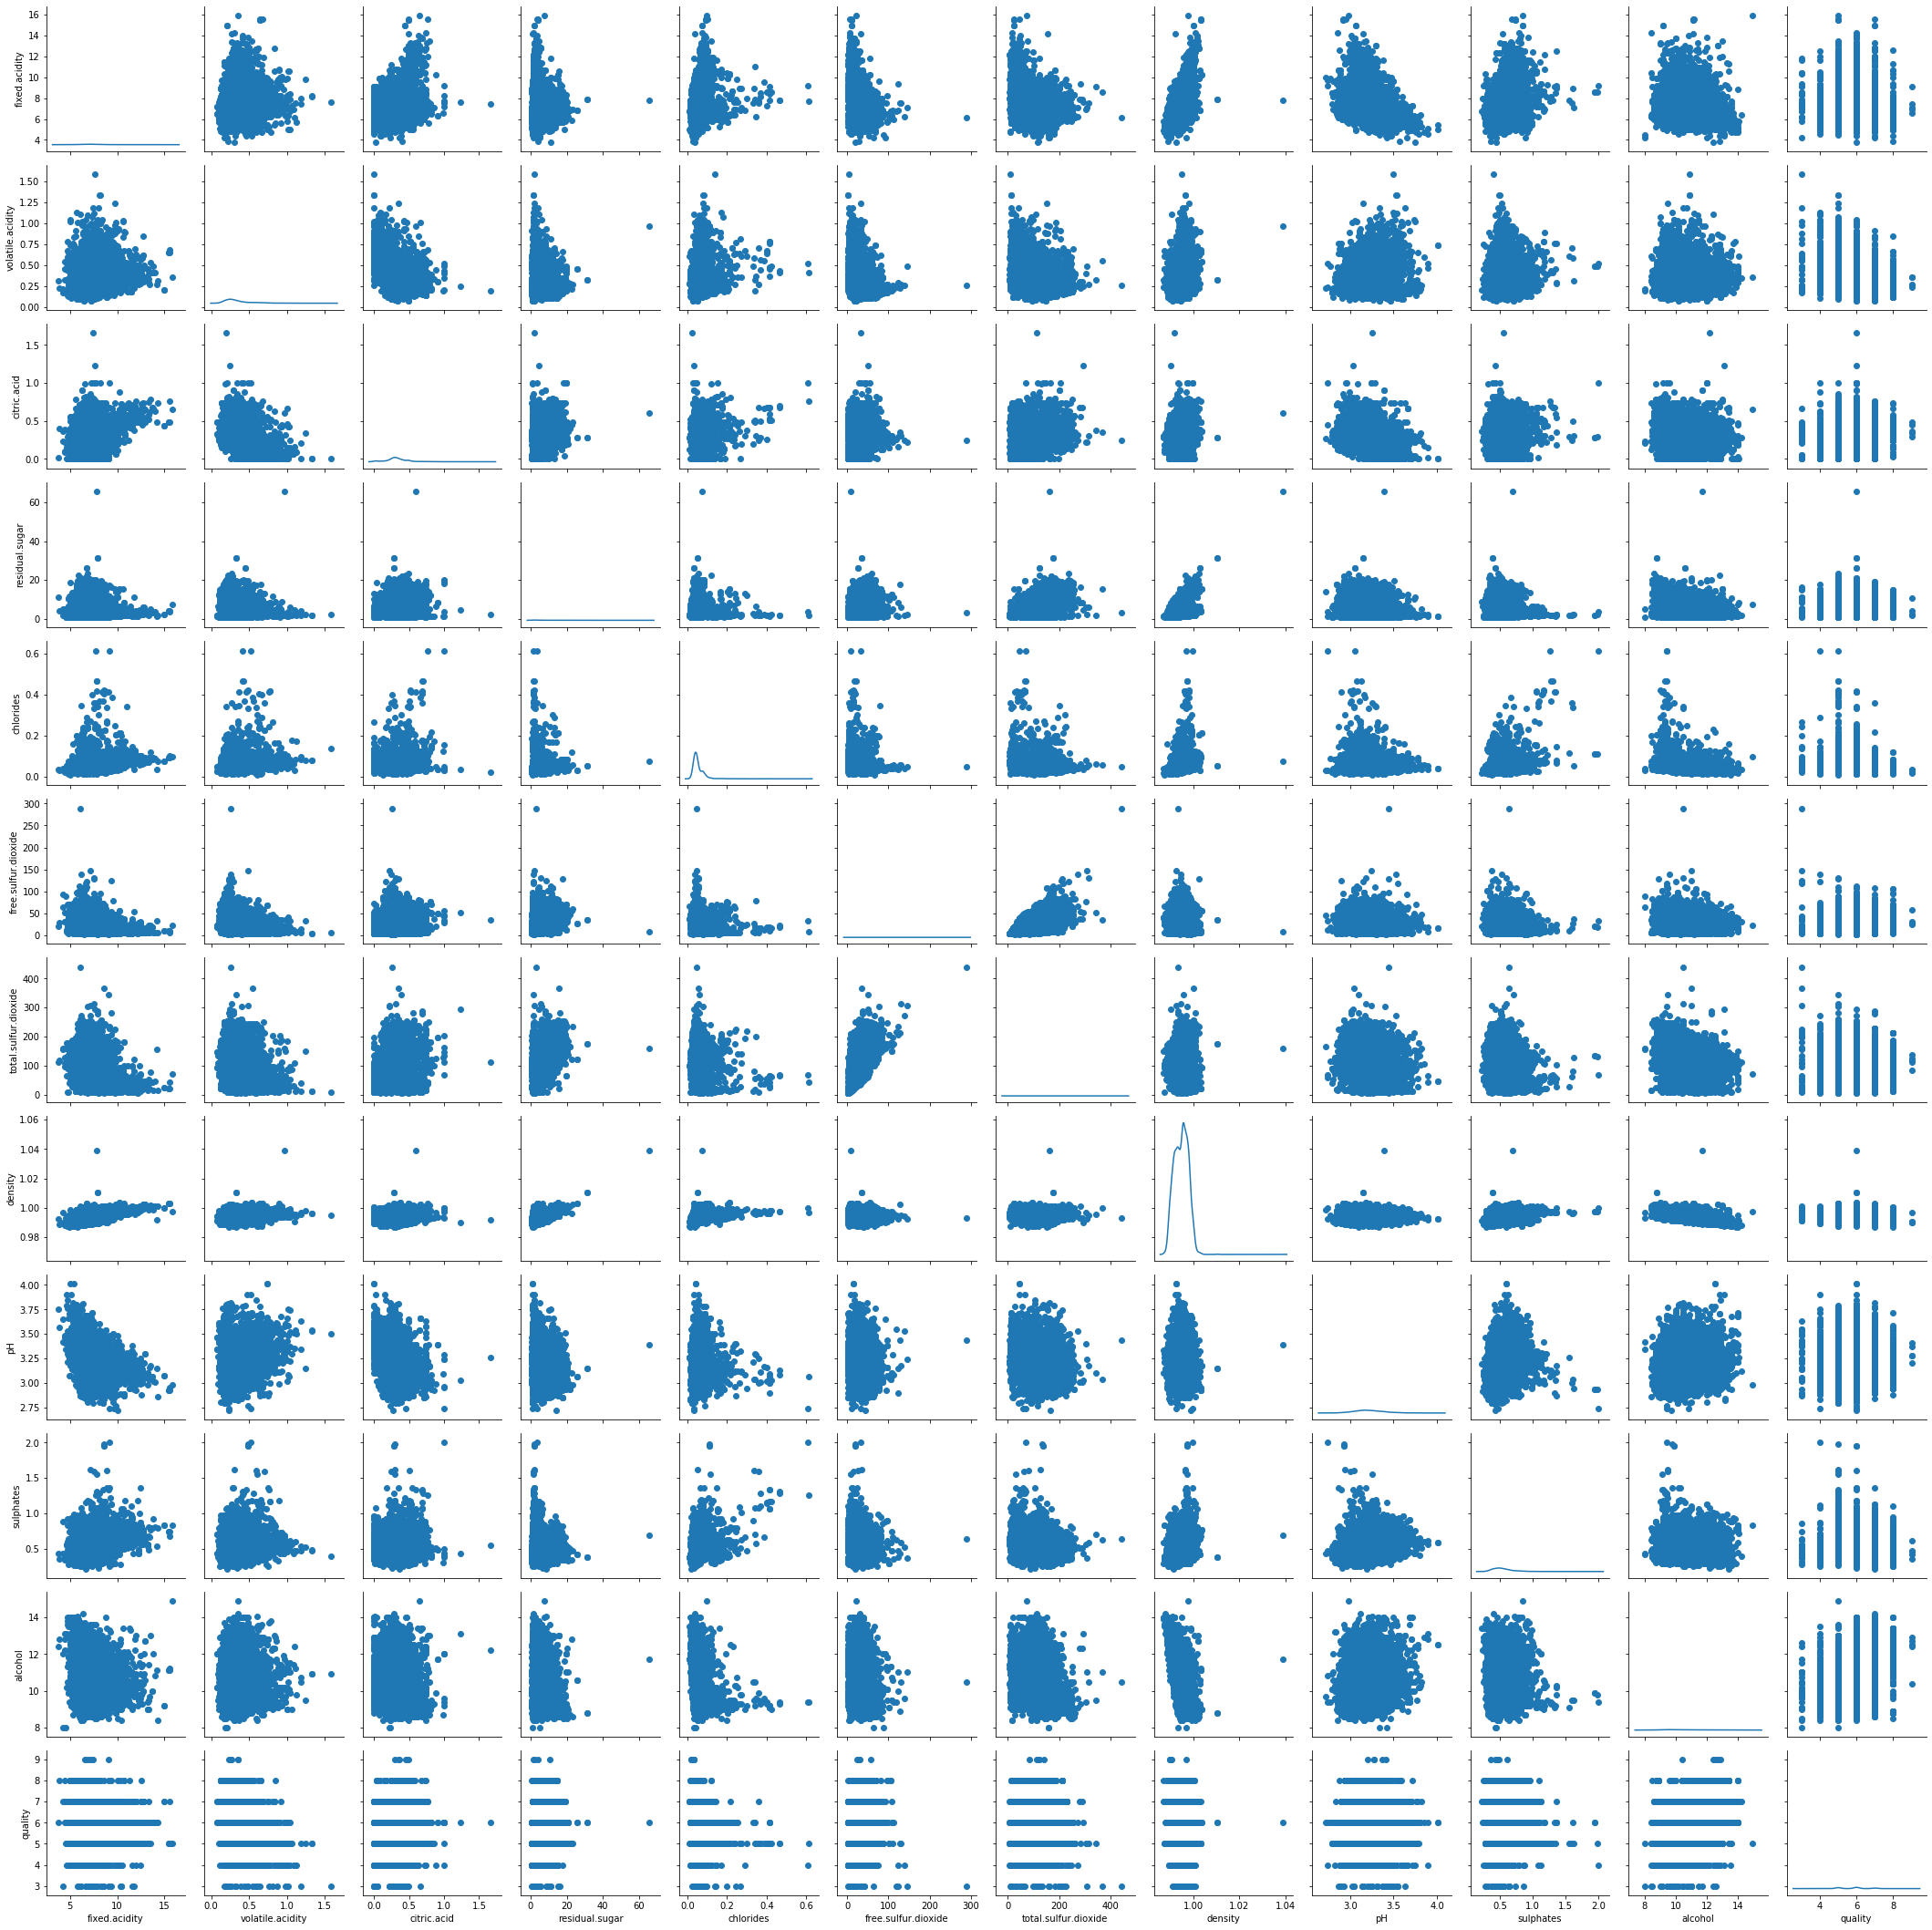

In [34]:
# Plot features
g = sns.PairGrid(wines)
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter);

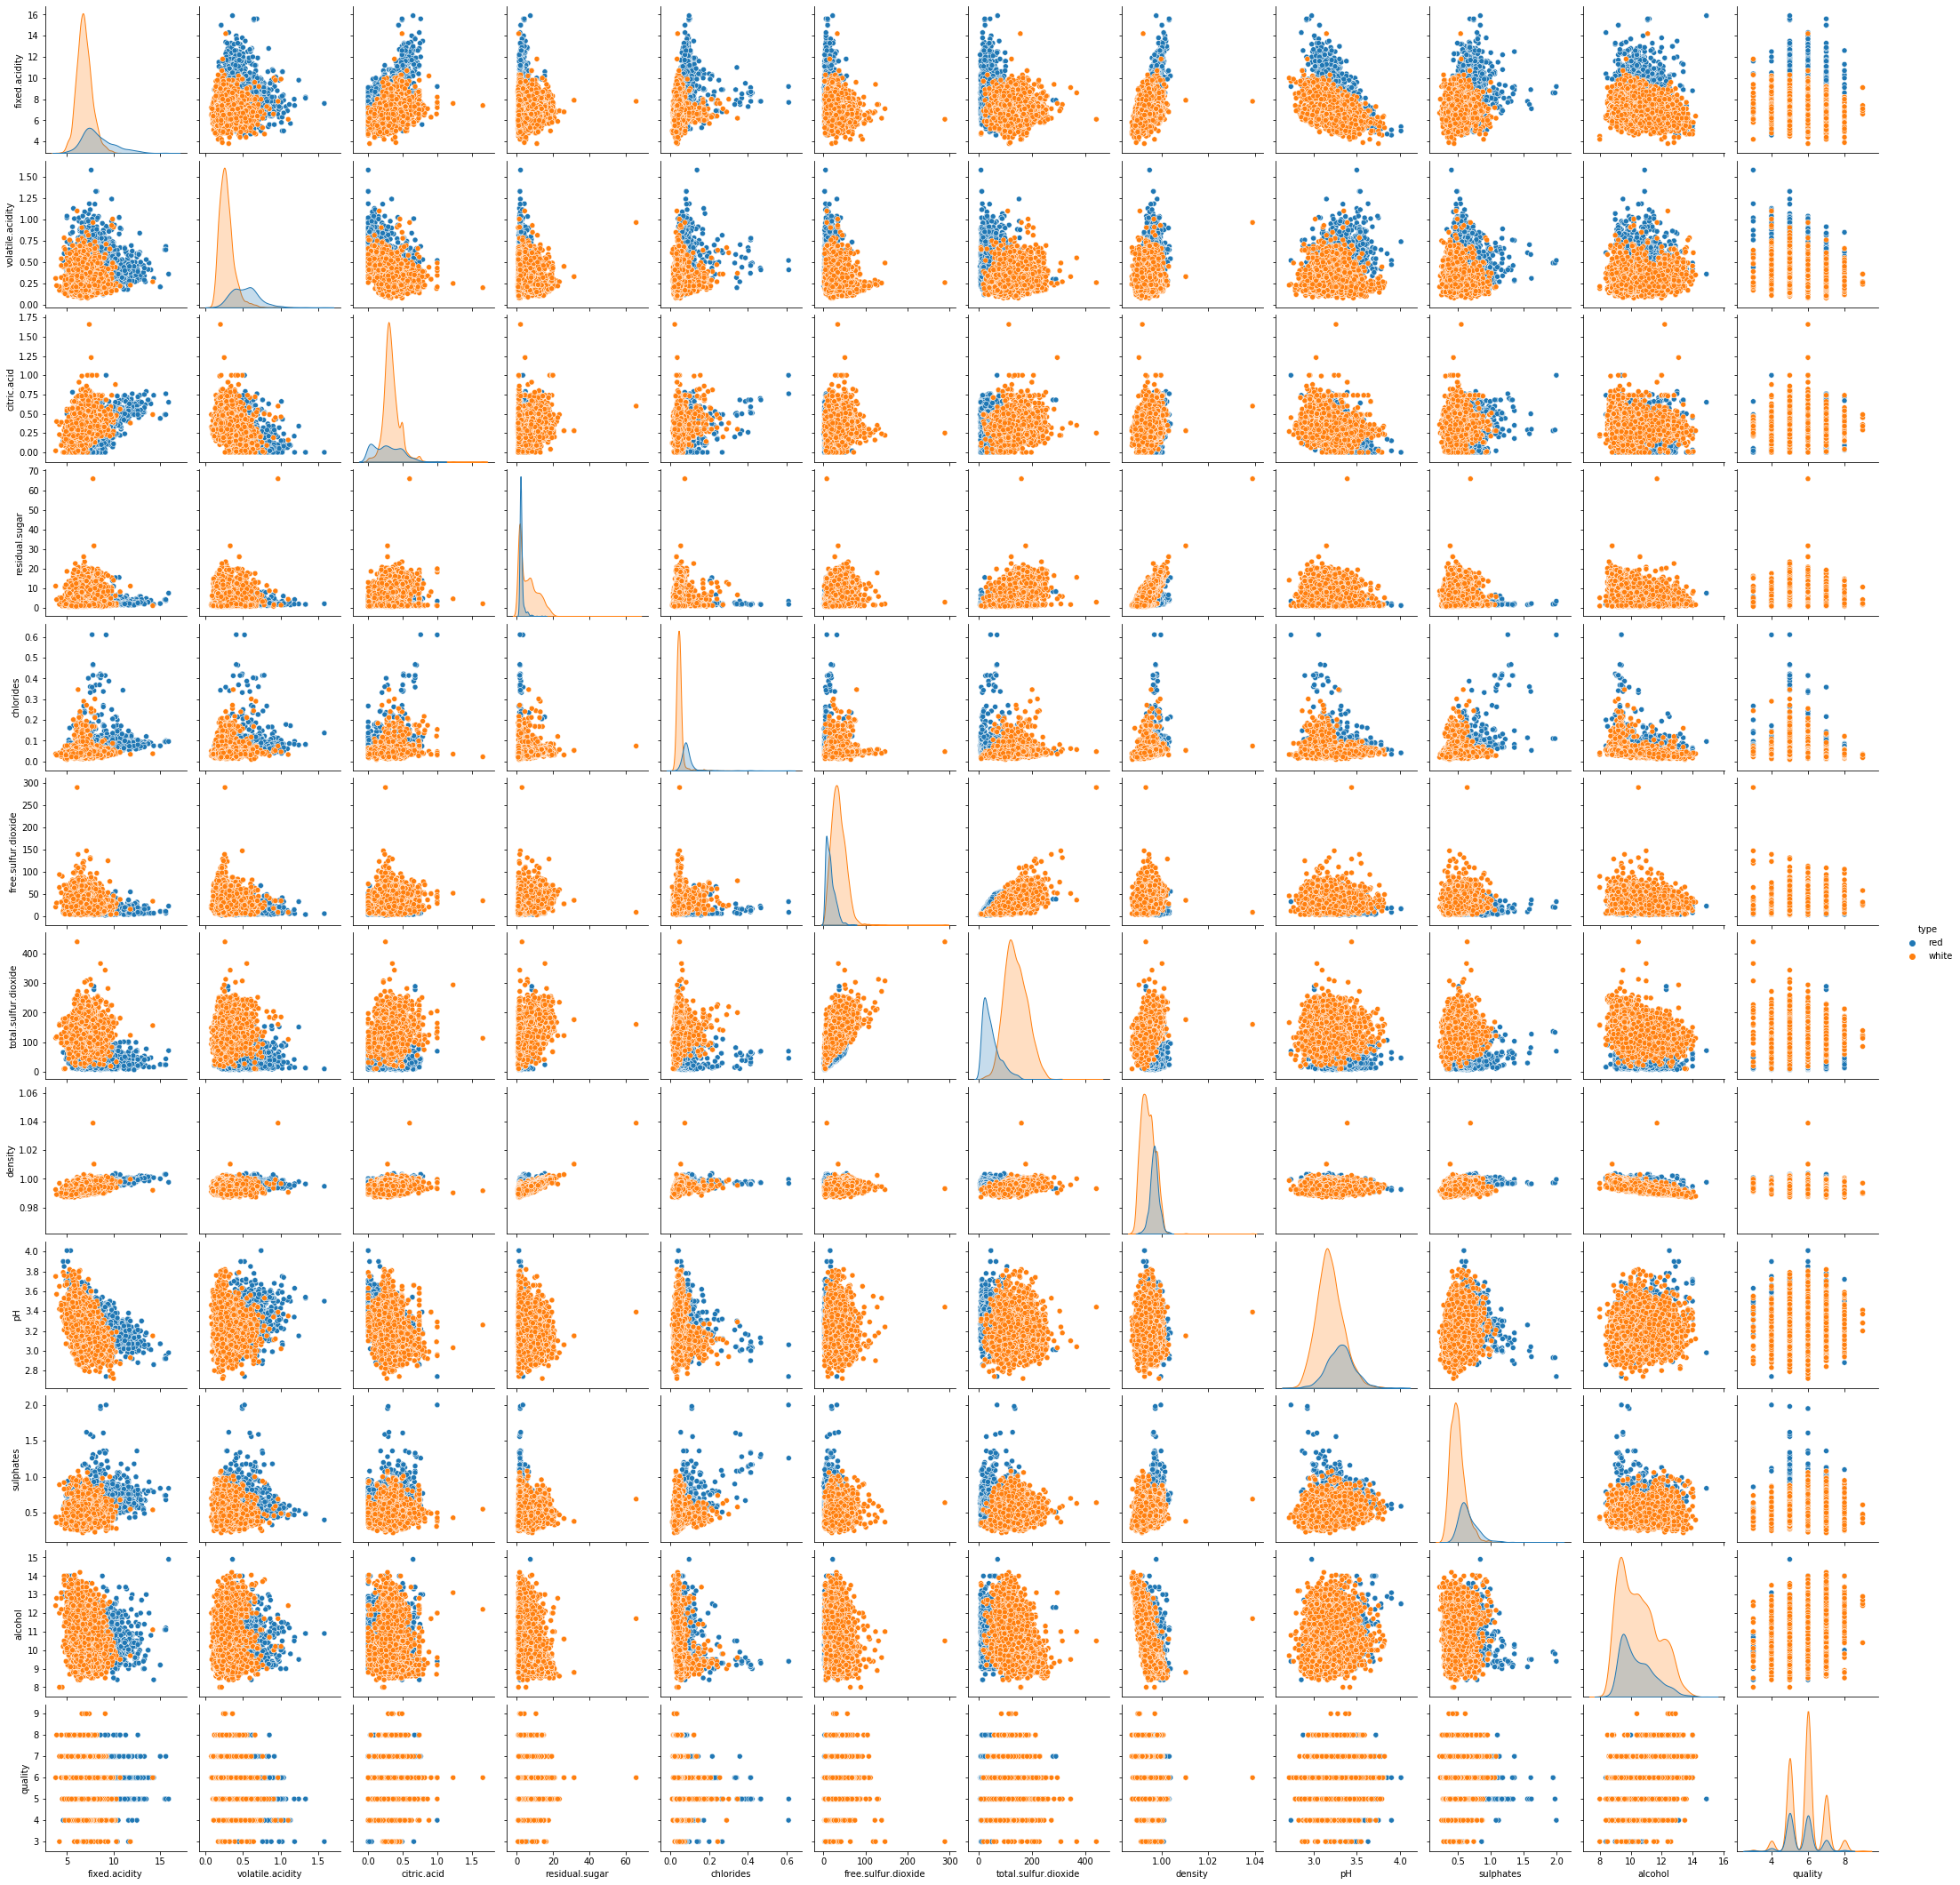

In [35]:
sns.pairplot(
    wines,
    hue = "type"
)

In [40]:
# Split between features and label
y = wines['quality'].values
z = wines['type'].values
X = wines.drop(axis=1, labels=['quality'])
X = wines.drop(axis=1, labels=['type'])

In [41]:
# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

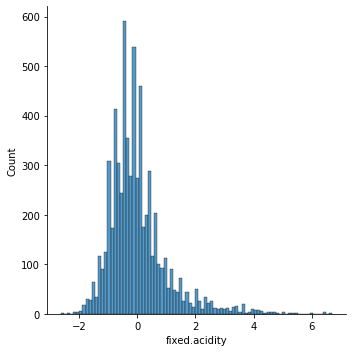

In [44]:
sns.displot(X['fixed.acidity'])

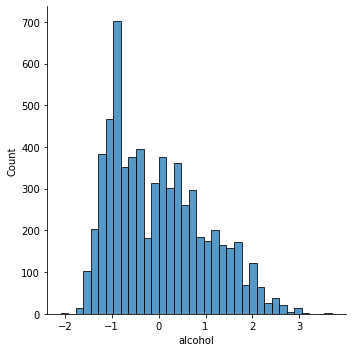

In [45]:
sns.displot(X['alcohol'])

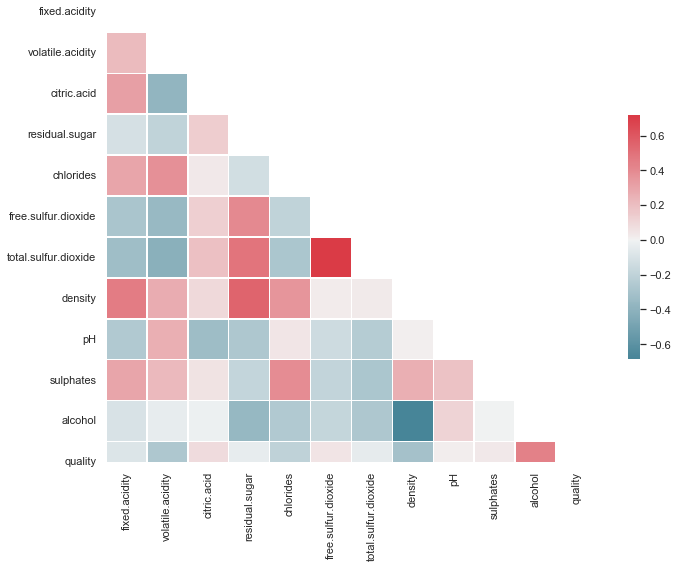

In [46]:
# Compute correlation matrix
corr = X.corr()

# Generate matrix for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Setup matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, square=True, cmap=cmap, center=0, linewidths=0.5, cbar_kws={"shrink": .5});

In [59]:
# Test and training validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [60]:
X_train.shape, X_test.shape

((5197, 12), (1300, 12))

In [61]:
cols = X_train.columns

In [62]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/Users/anymac/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model accuracy score with default hyperparameters: 0.9892


In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 50, 100],
    'gamma': [0.01, 0.1, 0.5, 1]
}

svc = SVC(gamma='scale', random_state=8)
clf = GridSearchCV(svc, param_grid=parameters, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 50, 100],
                         'gamma': [0.01, 0.1, 0.5, 1],
                         'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
clf.best_estimator_

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
print("Train: ", clf.score(X_train, y_train))
print("Test:  ", clf.score(X_test, y_test))

Train:  1.0
Test:   0.9996152366294728


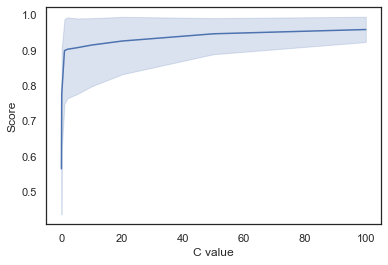

In [57]:
# Score versus C value
ax = sns.lineplot(x=clf.cv_results_['param_C'] ,y=clf.cv_results_['mean_test_score']);
ax.set(xlabel='C value', ylabel='Score')
plt.show()